In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

2113536/2110848 [==============================] - 0s 0us/step


In [5]:
len(train_data), len(test_data)

(8982, 2246)

In [16]:
len(train_data[0])

87

In [8]:
word_index = reuters.get_word_index()
revers_word_index = dict([(val, key) for (key, val) in word_index.items()])
decoded_newswire = ' '.join([revers_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels_ = to_categorical(train_labels)
one_hot_test_labels_ = to_categorical(test_labels)

one_hot_train_labels_ == one_hot_train_labels
one_hot_test_labels_ == one_hot_test_labels

In [21]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [22]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [26]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    batch_size=512, 
                    epochs=20,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 2.7591 - accuracy: 0.5081 - val_loss: 1.7633 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.4264 - accuracy: 0.7129 - val_loss: 1.3101 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0351 - accuracy: 0.7779 - val_loss: 1.1332 - val_accuracy: 0.7690
Epoch 4/20
16/16 [==============================] - 1s 42ms/step - loss: 0.8146 - accuracy: 0.8252 - val_loss: 1.0547 - val_accuracy: 0.7690
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6446 - accuracy: 0.8690 - val_loss: 0.9700 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 42ms/step - loss: 0.5184 - accuracy: 0.8948 - val_loss: 0.9256 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4171 - accuracy: 0.9146 - val_loss: 0.9645 - val_accuracy: 0.7930
Epoch 8/20
16

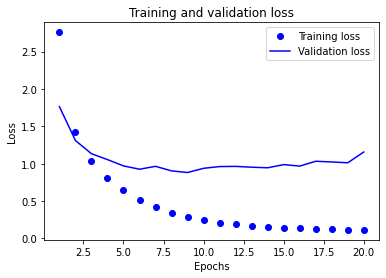

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
# print(history.history.keys())
epochs = range(1, 1+len(loss))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [30]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


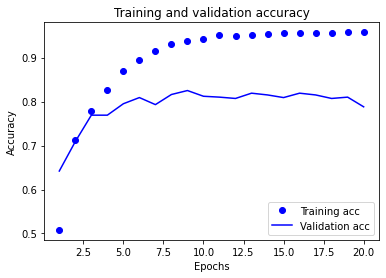

In [32]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
model.fit(partial_x_train, partial_y_train,batch_size=9, epochs=9,
          validation_data=(x_val, y_val))
result = model.evaluate(x_test, one_hot_test_labels)
# Returns the loss value & metrics values for the model in test mode.


Epoch 1/9
887/887 [==============================] - 6s 7ms/step - loss: 1.3305 - accuracy: 0.7080 - val_loss: 1.0355 - val_accuracy: 0.7800
Epoch 2/9
887/887 [==============================] - 6s 7ms/step - loss: 0.8004 - accuracy: 0.8282 - val_loss: 0.9381 - val_accuracy: 0.8090
Epoch 3/9
887/887 [==============================] - 7s 7ms/step - loss: 0.5711 - accuracy: 0.8779 - val_loss: 0.9904 - val_accuracy: 0.8180
Epoch 4/9
887/887 [==============================] - 7s 7ms/step - loss: 0.4450 - accuracy: 0.9062 - val_loss: 0.9802 - val_accuracy: 0.8160
Epoch 5/9
887/887 [==============================] - 7s 7ms/step - loss: 0.3584 - accuracy: 0.9245 - val_loss: 1.0724 - val_accuracy: 0.8110
Epoch 6/9
887/887 [==============================] - 7s 8ms/step - loss: 0.3000 - accuracy: 0.9342 - val_loss: 1.2562 - val_accuracy: 0.8070
Epoch 7/9
887/887 [==============================] - 7s 8ms/step - loss: 0.2705 - accuracy: 0.9410 - val_loss: 1.4881 - val_accuracy: 0.8200
Epoch 8/9
887

In [39]:
predictions = model.predict(x_test)
np.argmax(predictions[0])

3

In [42]:
print(np.array(test_labels),test_labels)

[ 3 10  1 ...  3  3 24] [ 3 10  1 ...  3  3 24]
